In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ElectricCarData_Clean_Me.csv')

In [3]:
df.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,460,70.0,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,45.0,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,75.0,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,74.0,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,28.5,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,110.0,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,35.8,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,45.0,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,50.0,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,77.0,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [4]:
df.tail(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Battery_Pack Kwh,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
92,Nissan,Ariya e-4ORCE 87kWh,5.7,200,420,87.0,207,500,Yes,AWD,Type 2 CCS,Hatchback,C,5,57500
93,Fiat,500e Convertible,9.0,150,250,23.8,168,330,Yes,FWD,Type 2 CCS,Cabrio,B,4,37900
94,Volkswagen,ID.3 Pro Performance,7.3,160,340,58.0,171,470,Yes,RWD,Type 2 CCS,Hatchback,C,5,35575
95,Kia,e-Soul 39 kWh,9.9,157,230,39.0,170,220,Yes,FWD,Type 2 CCS,SUV,B,5,33133
96,Byton,M-Byte 72 kWh 2WD,7.5,190,325,72.0,222,420,Yes,RWD,Type 2 CCS,SUV,E,5,53500
97,Nissan,Ariya 63kWh,7.5,160,330,63.0,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
98,Audi,e-tron S Sportback 55 quattro,4.5,210,335,86.5,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
99,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,63.0,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
100,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,87.0,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
101,Byton,M-Byte 95 kWh 2WD,7.5,190,400,95.0,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [5]:
df.shape

(102, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             102 non-null    object 
 1   Model             102 non-null    object 
 2   AccelSec          102 non-null    float64
 3   TopSpeed_KmH      102 non-null    int64  
 4   Range_Km          102 non-null    int64  
 5   Battery_Pack Kwh  102 non-null    float64
 6   Efficiency_WhKm   102 non-null    int64  
 7   FastCharge_KmH    102 non-null    int64  
 8   RapidCharge       102 non-null    object 
 9   PowerTrain        102 non-null    object 
 10  PlugType          102 non-null    object 
 11  BodyStyle         102 non-null    object 
 12  Segment           102 non-null    object 
 13  Seats             102 non-null    int64  
 14  PriceEuro         102 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 12.1+ KB


In [7]:
df.isnull().sum()

Brand               0
Model               0
AccelSec            0
TopSpeed_KmH        0
Range_Km            0
Battery_Pack Kwh    0
Efficiency_WhKm     0
FastCharge_KmH      0
RapidCharge         0
PowerTrain          0
PlugType            0
BodyStyle           0
Segment             0
Seats               0
PriceEuro           0
dtype: int64

In [8]:
df['FullName'] = df['Brand']+df['Model']

In [9]:
df1 = df.loc[df['PriceEuro'] <= 50000]
df2 = df.loc[df['PriceEuro'] > 50000]
h1 = 'Less than 50,000 Euros' 
h2 = 'More than 50,000 Euros'

# DATA VISUALIZATION

*COUNT PLOT FOR BODY STYLE*

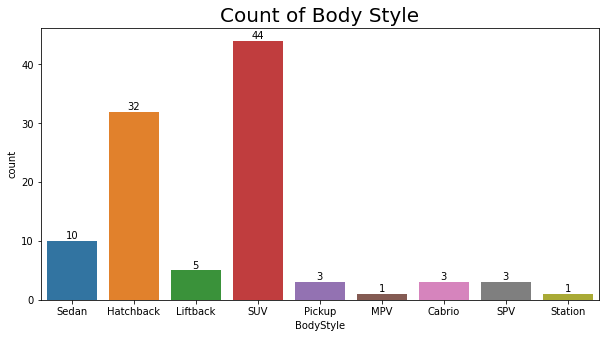

In [10]:
plt.figure(figsize=(10, 5))
bs = sns.countplot(x='BodyStyle', data=df)

for values in bs.containers:
    bs.bar_label(values)
    
plt.title('Count of Body Style', fontsize= 20)
plt.show()

*COUNT PLOT OF POWERTRAIN*

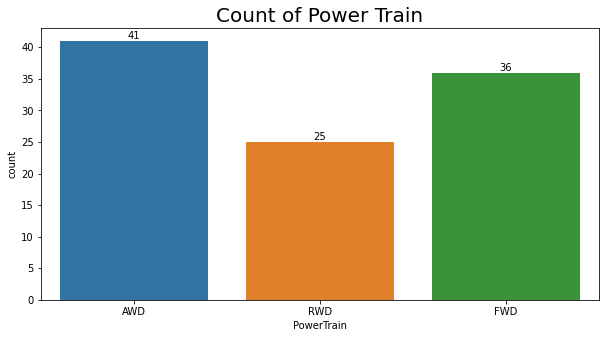

In [11]:
plt.figure(figsize=(10, 5))
bs = sns.countplot(x='PowerTrain', data=df)

for values in bs.containers:
    bs.bar_label(values)
    
plt.title('Count of Power Train', fontsize= 20)
plt.show()

*Most popular Brands*

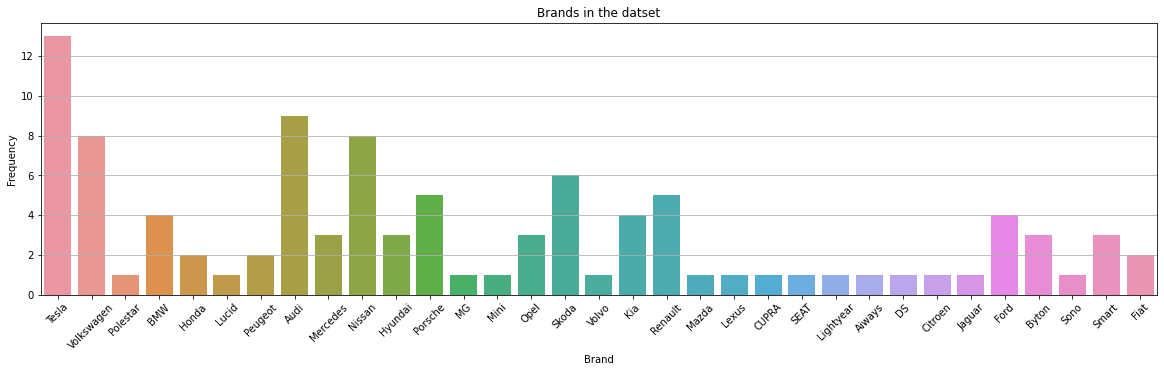

In [12]:
ax= plt.figure(figsize=(20,5))
sns.countplot(x='Brand',data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

*Top speeds achieved by the cars of a brand*

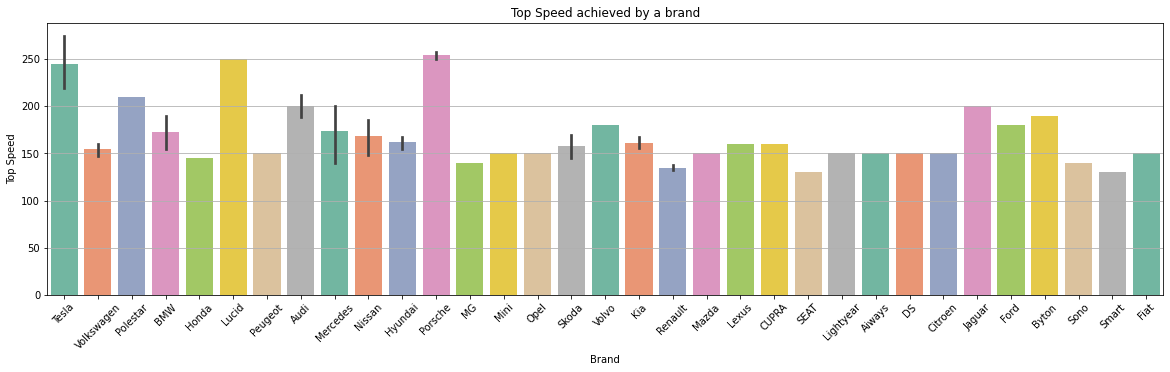

In [13]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='Set2')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

*Number of seats in each car*

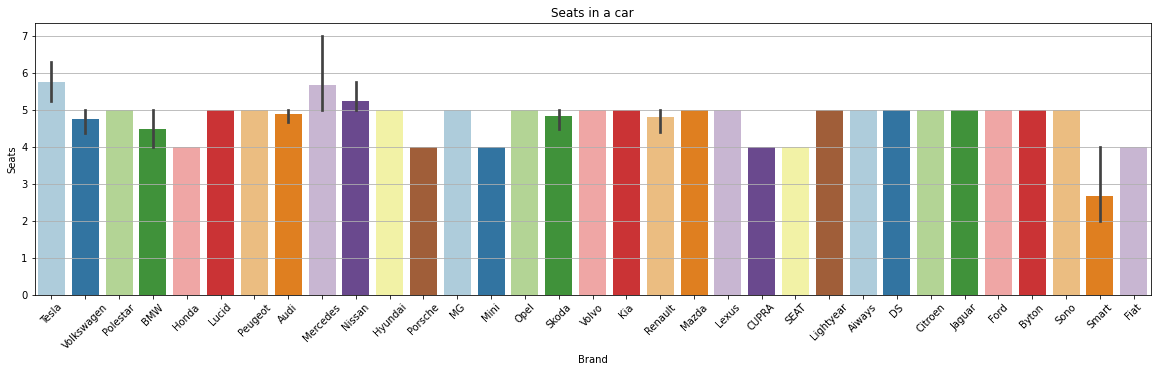

In [14]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)
plt.show()

*Price of Cars in Euros*

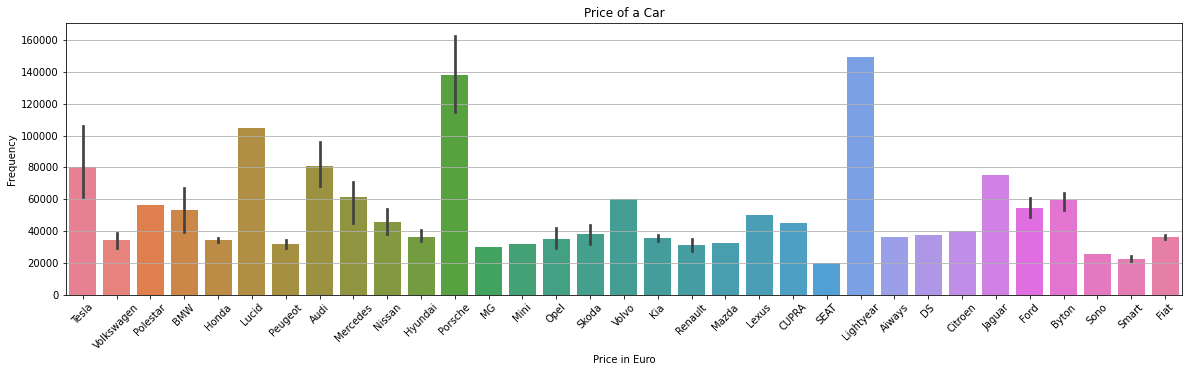

In [15]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='PriceEuro',data=df,palette='husl')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

*Type of Plug used for charging*

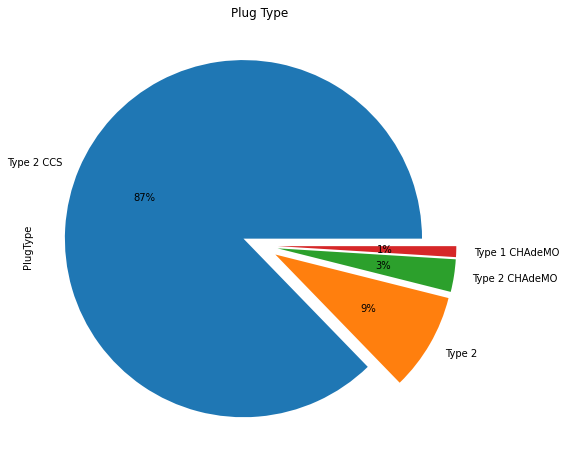

In [16]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')
plt.show()

*Segment in which the cars fall under*

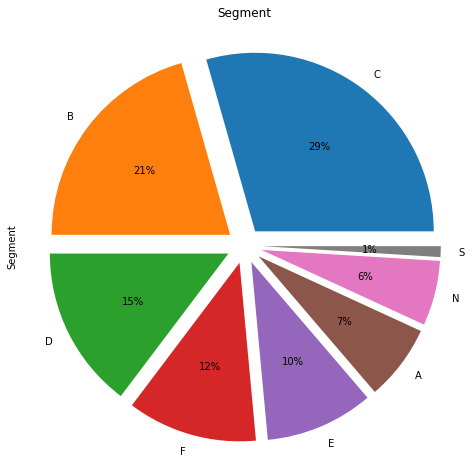

In [17]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segment')
plt.show()

*Cars and their body style*

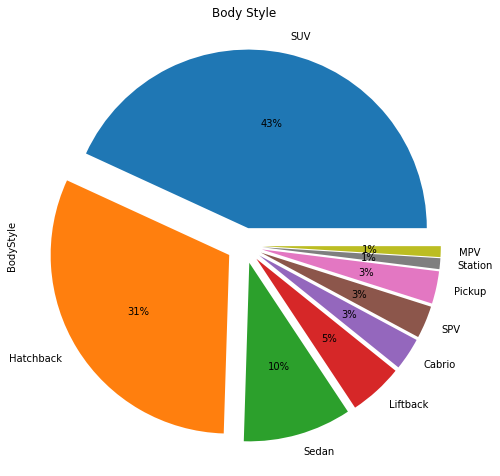

In [18]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style')
plt.show()

*Range of Vehicles*

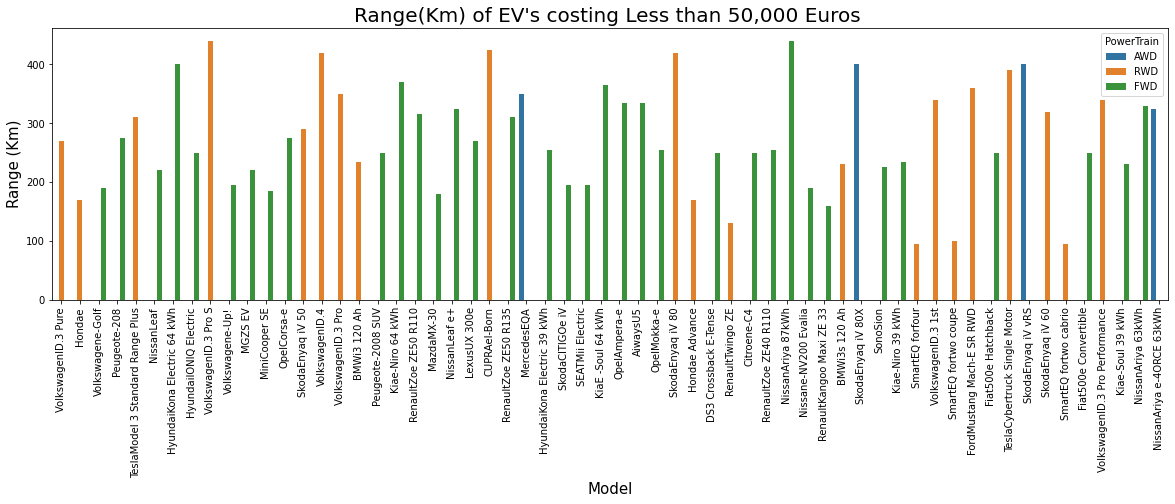

In [19]:
  plt.figure(figsize=(20,5))
#   sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='Range_Km' , data = df1, hue = df['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(h1), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

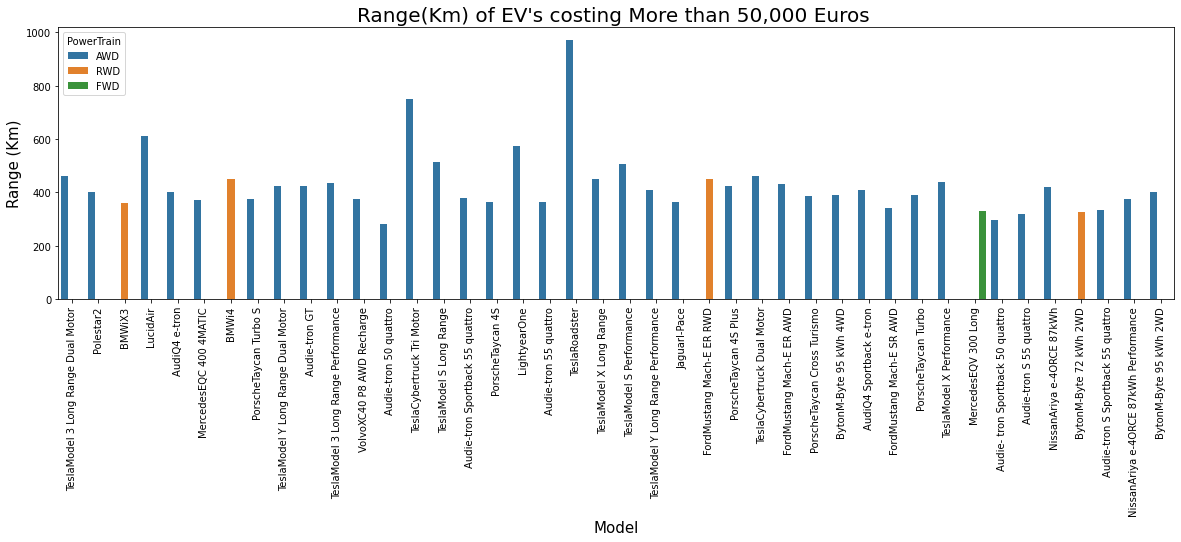

In [20]:
  plt.figure(figsize=(20,5))
#   sns.set_theme(style="whitegrid")
  sns.barplot(x='FullName', y='Range_Km' , data = df2, hue = df['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(h2), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

*Range Vs Battery*

In [21]:
def range_battery(dataframe, text):
    fig = plt.figure(figsize=(20,5))
    ax1 = plt.subplot()
    ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'orange')
    plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
    ax2 = ax1.twinx()
    ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
    plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
    ax1.set_xlabel('Models', size = 20)
    ax1.set_ylabel('Range (Km)', color = 'orange', size = 20)
    ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
    plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
    ax1.set_xticklabels(df1['FullName'], rotation = 'vertical')
    plt.show()

<ipython-input-21-eef97823c348>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df1['FullName'], rotation = 'vertical')


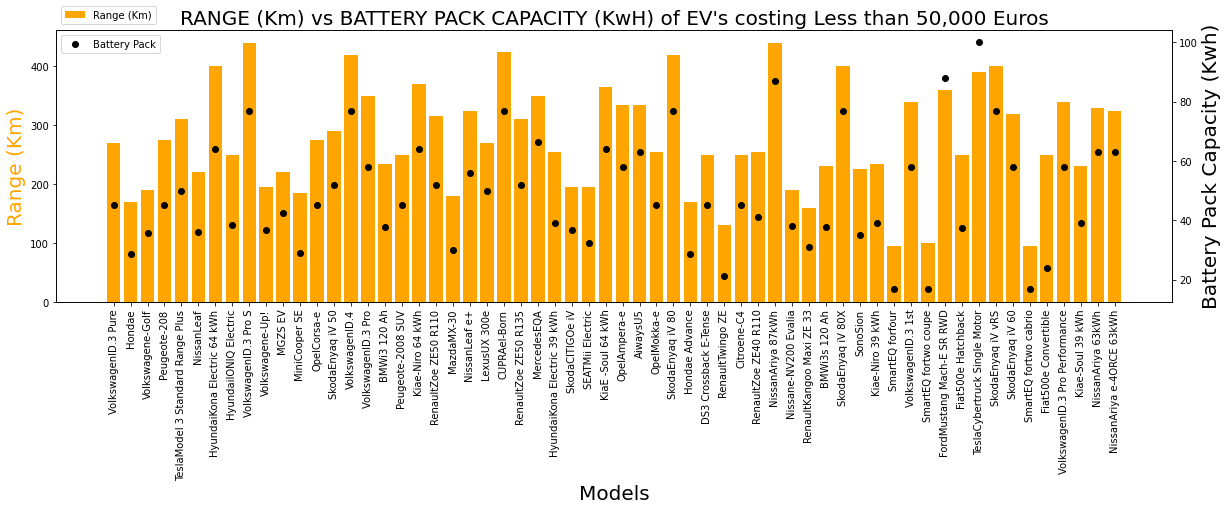

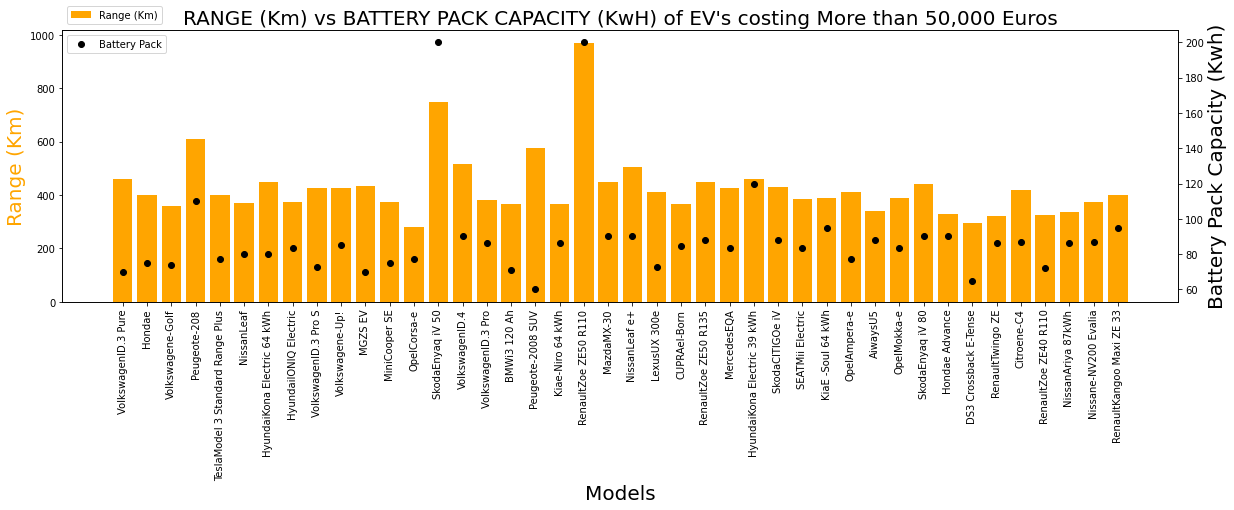

In [22]:
range_battery(df1,h1)
range_battery(df2,h2)

*Range Vs Efficieny*

In [23]:
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'pink')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'pink', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df1['FullName'], rotation = 'vertical')
  plt.show()

<ipython-input-23-3e7977d489cb>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df1['FullName'], rotation = 'vertical')


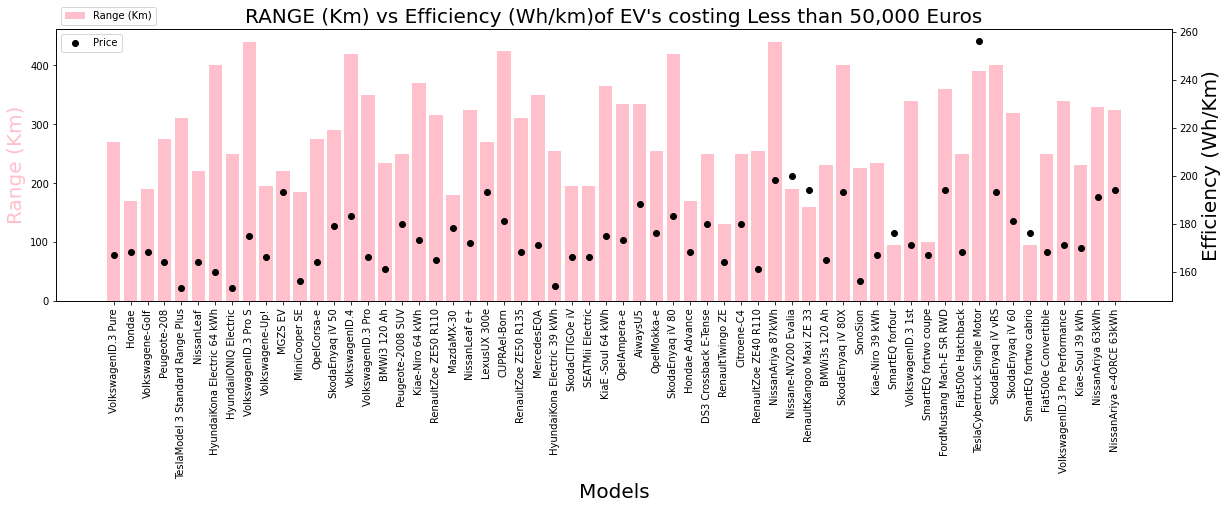

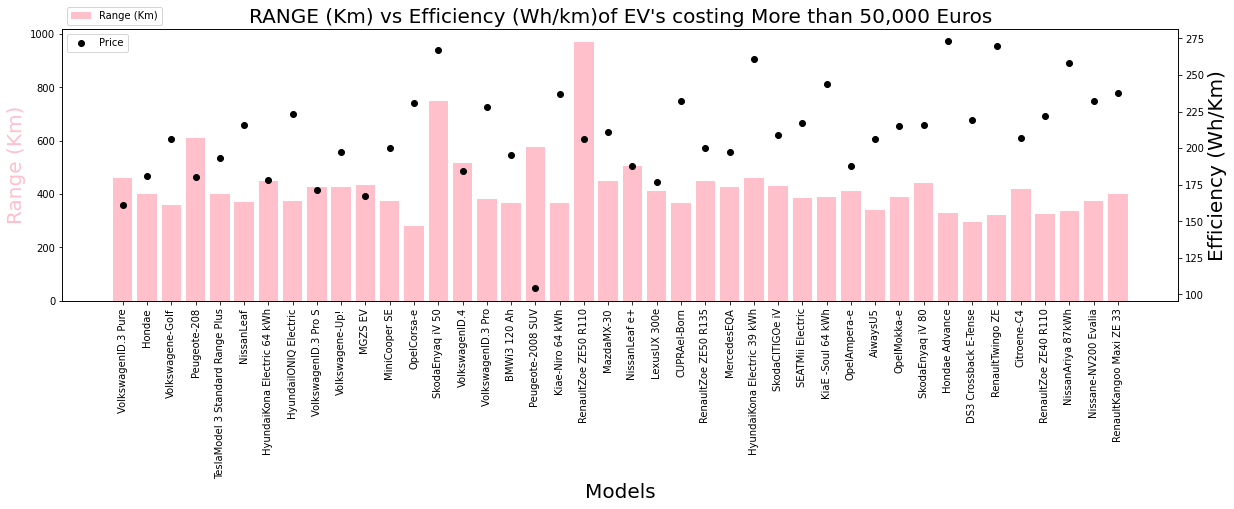

In [24]:
range_efficiency(df1,h1)
range_efficiency(df2,h2)